In [16]:
import numpy as np
from mlxtend.data import loadlocal_mnist
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
xTrain,yTrain=loadlocal_mnist(images_path='./mnist/train-images.idx3-ubyte', labels_path='./mnist/train-labels.idx1-ubyte')
xTest,yTest = loadlocal_mnist(images_path='./mnist/t10k-images.idx3-ubyte', labels_path='./mnist/t10k-labels.idx1-ubyte')

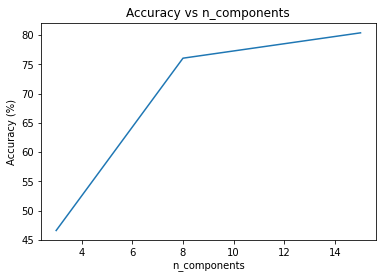

In [17]:
ncomponents = [3,8,15]
allAccuracy = []

for n in ncomponents:
    scaler = StandardScaler()
    scaler.fit_transform(xTrain)
    pca = PCA(n_components = n)
    transform = pca.fit_transform(xTrain)
    lda = LinearDiscriminantAnalysis()
    lda.fit(transform,yTrain)
    transformTest = pca.transform(xTest)
    yPredict = lda.predict(transformTest)
    allAccuracy.append(100*np.sum(yPredict == yTest)/len(yTest))

plt.figure("Plotting accuracies")
plt.xlabel("n_components")
plt.ylabel("Accuracy (%)")
plt.plot(ncomponents,allAccuracy)
plt.title("Accuracy vs n_components")
plt.show()
